In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32


2176

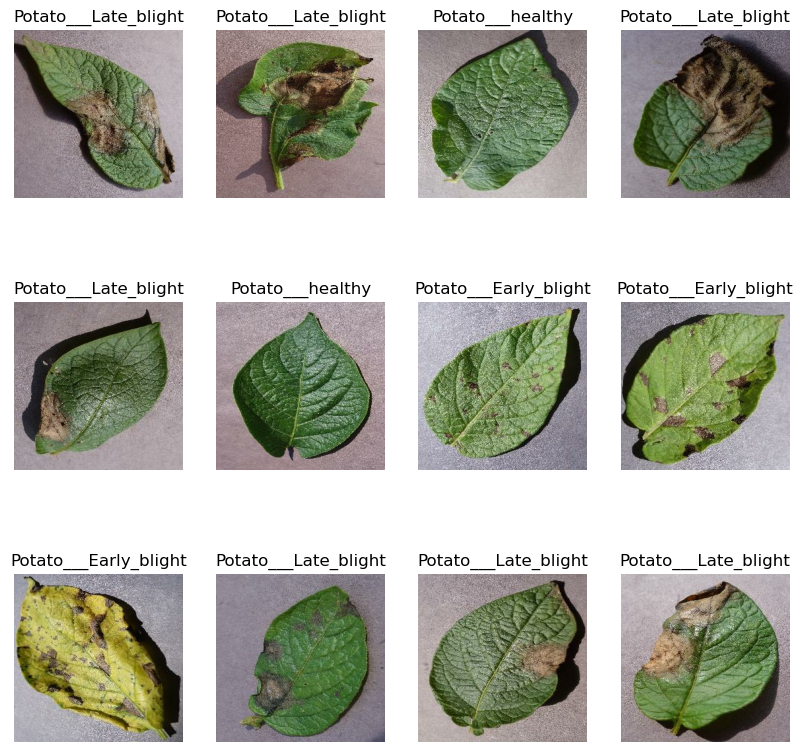

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
#     print(image_batch.shape)
#     print(label_batch.numpy())
#     print(image_batch[0].numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [9]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(train_ds)

54

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [14]:


val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size =int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
len(dataset)

68

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [27]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 85s 2s/step - loss: 0.9199 - accuracy: 0.5127 - val_loss: 0.8182 - val_accuracy: 0.4948
Epoch 2/50
54/54 [==============================] - 74s 1s/step - loss: 0.7128 - accuracy: 0.6522 - val_loss: 0.4697 - val_accuracy: 0.8385
Epoch 3/50
54/54 [==============================] - 622s 12s/step - loss: 0.4794 - accuracy: 0.8009 - val_loss: 0.3165 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 72s 1s/step - loss: 0.3773 - accuracy: 0.8414 - val_loss: 0.2685 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 266s 5s/step - loss: 0.2976 - accuracy: 0.8773 - val_loss: 0.2330 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 89s 2s/step - loss: 0.2791 - accuracy: 0.8935 - val_loss: 0.1890 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 84s 2s/step - loss: 0.2465 - accuracy: 0.9086 - val_loss: 0.1999 - val_accuracy: 0.9062
Epoch 8/50
54/54 

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 408ms/step - loss: 0.1400 - accuracy: 0.9609


In [30]:
scores

[0.1399613469839096, 0.9609375]

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.5127314925193787,
 0.6521990895271301,
 0.8009259104728699,
 0.8414351940155029,
 0.8773148059844971,
 0.8935185074806213,
 0.9085648059844971,
 0.9068287014961243,
 0.9369212985038757,
 0.9473379850387573,
 0.9542824029922485,
 0.9606481194496155,
 0.9606481194496155,
 0.9699074029922485,
 0.9641203880310059,
 0.96875,
 0.9652777910232544,
 0.9762731194496155,
 0.9832175970077515,
 0.9756944179534912,
 0.9861111044883728,
 0.9849537014961243,
 0.9693287014961243,
 0.9866898059844971,
 0.9855324029922485,
 0.984375,
 0.9832175970077515,
 0.9884259104728699,
 0.9809027910232544,
 0.9814814925193787,
 0.9890046119689941,
 0.9872685074806213,
 0.9785879850387573,
 0.9890046119689941,
 0.9895833134651184,
 0.9936342835426331,
 0.9797453880310059,
 0.9942129850387573,
 0.9942129850387573,
 0.9924768805503845,
 0.9872685074806213,
 0.9930555820465088,
 0.9942129850387573,
 0.9820601940155029,
 0.9930555820465088,
 0.9820601940155029,
 0.9890046119689941,
 0.9965277910232544,
 0.9971064925

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

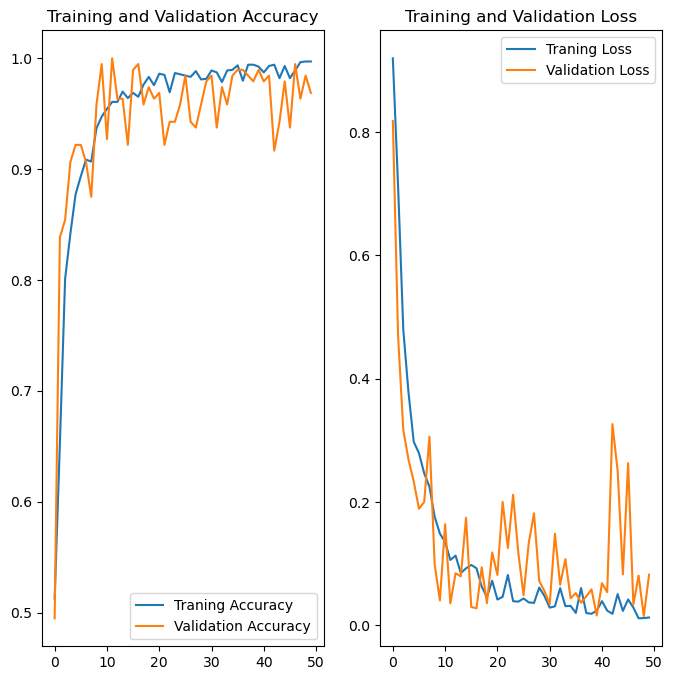

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Traning Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Traning Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')

First image to show
actual label: Potato___Late_blight
1/1 [==============================] - 0s 203ms/step
predicted label: Potato___Late_blight


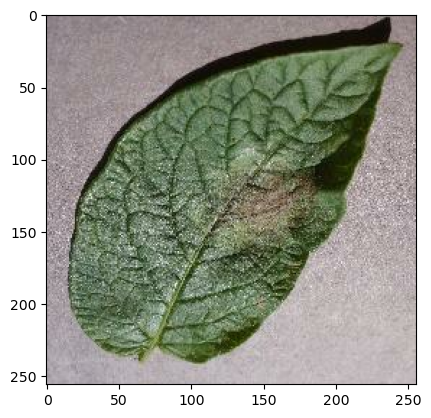

In [74]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("First image to show")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [75]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


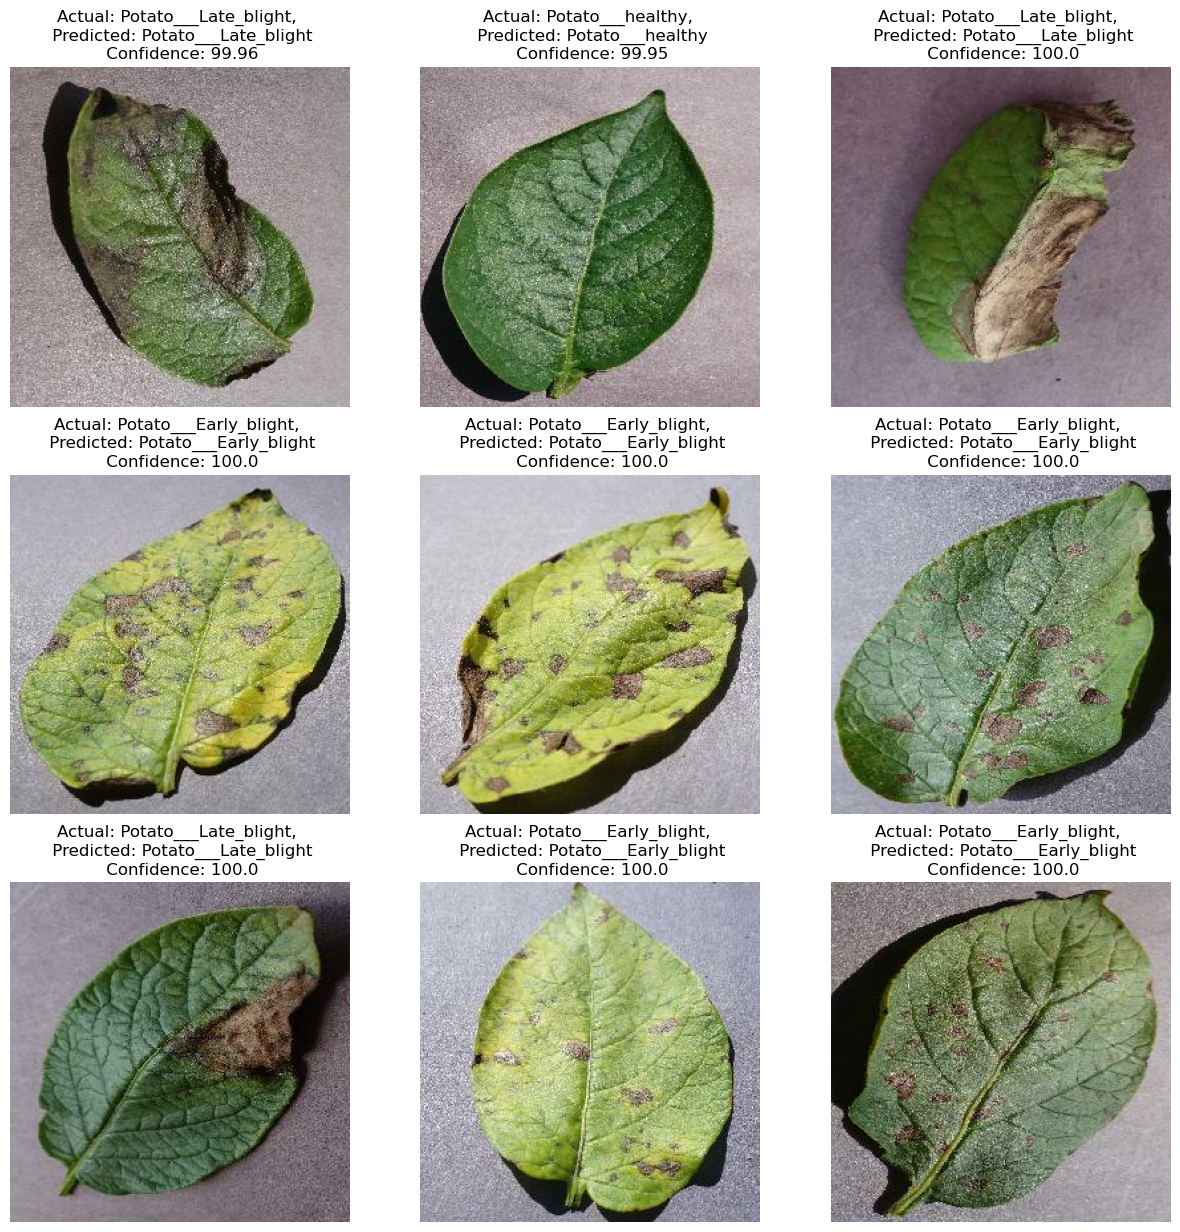

In [84]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}\n Confidence: {confidence}")
        plt.axis("off")

In [126]:
import os
model_version = max([int(i) for i in os.listdir("../models")[1:] + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4/assets


INFO:tensorflow:Assets written to: ../models/4/assets


INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets
